## Plotting machin because R prout prout

In [81]:
from matplotlib import pyplot as plt
from matplotlib import axes as ax
import matplotlib
import numpy as np
import pandas as pd
from statistics import mean

In [82]:
matplotlib.__version__

'3.3.4'

In [24]:
dataset = pd.read_excel('FunEco-OUTSIDE.xlsx', skiprows=2)
#print(dataset)
measurements = pd.read_excel('Measurement Campaign.xlsx')
#print(measurements)

<function matplotlib.pyplot.show(close=None, block=None)>

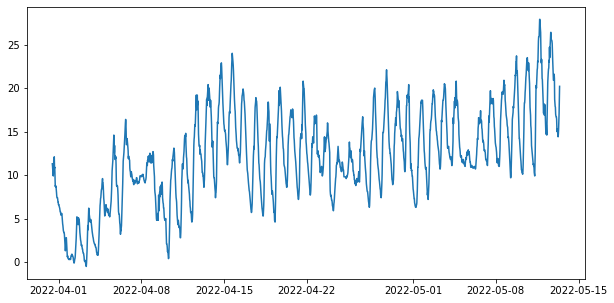

In [25]:
time = dataset.iloc[0:2062,0]
temp = dataset.iloc[0:2062,3]
#doing a day average
plt.plot(time,temp)
plt.show


In [26]:
# Temperature and humidity in pots for comparison
C_temp = [9.53, 9.47, 9.7, 18.13, 18.63, 18.37, 23.37,22.9,25.1]
C_temp_avg = [9.57, 18.377,23.79]
T_temp = [9.6,9.5,9.56,14.27,14.37,16.5,23.97,23.5,26.4]
T_temp_avg = [9.553,15.047,24.623]
C_hum = [33.37,31.13,15.37,27.17,33.7,23.3,24.5,24.4,19.7]
C_hum_avg = [26.623, 28.057,22.87]
T_hum = [33.83,23.53,32.23,32.47,28.87,24.77,13.33,16.53,8.73]
T_hum_avg = [29.863,28.703,12.863]
time_msm = [14,35,49]
print(len(time_msm),len(C_hum_avg))

3 3


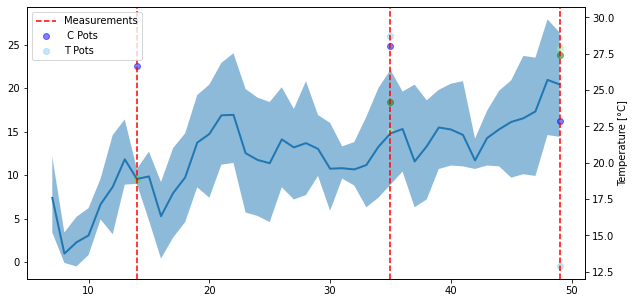

In [27]:
tempday = []
tempdaymax = []
tempdaymin = []
for i in range(0,len(temp),48):
    tempday.append(mean(temp[i:i+48]))
    tempdaymax.append(max(temp[i:i+48]))
    tempdaymin.append(min(temp[i:i+48]))
timeday = []
for i in range(7,50):
    timeday.append(i)
#plot
fig, ax = plt.subplots()
plt.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
plt.plot(timeday, tempday, linewidth=2, label="Mean")
plt.scatter(time_msm, C_temp_avg, c='g', alpha=0.5, label = " C Pots")
plt.scatter(time_msm, T_temp_avg, c='palegreen', alpha=0.5, label = "T Pots")
axis_hum = plt.twinx()
plt.scatter(time_msm, C_hum_avg, c='blue', alpha=0.5, label = " C Pots")
plt.scatter(time_msm, T_hum_avg, c='lightskyblue', alpha=0.5, label = "T Pots")
plt.xlabel("Time [days]")
plt.ylabel("Temperature [°C]")
plt.axvline(x=14, color='red', linestyle='--', label  = "Measurements")
plt.axvline(x=35, color='red', linestyle='--')
plt.axvline(x=49, color='red', linestyle='--')
plt.legend(loc='upper left')

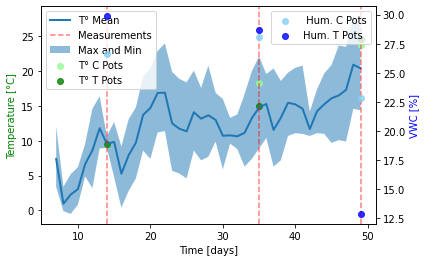

In [9]:
fig, ax1 = plt.subplots()
ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
ax1.scatter(time_msm, C_temp_avg, c='palegreen', alpha=0.8, label = "T° C Pots")
ax1.scatter(time_msm, T_temp_avg, c='g', alpha=0.8, label = "T° T Pots")
ax2 = ax1.twinx()
ax2.set_ylabel("VWC [%]", color = "blue")
ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "g")
ax1.axvline(x=14, color='red', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='red', linestyle='--', alpha=0.5)
#ax1.legend(loc='upper left')
ax1.legend(loc='upper left')
plt.legend()
plt.rcParams['figure.figsize'] = [10, 5]

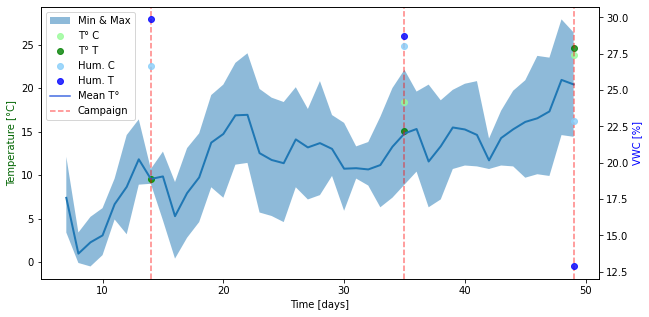

In [10]:
### CHOSEN PLOT ###
fig, ax1 = plt.subplots()
#Temperature
fill = ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
mean = ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
C_T = ax1.scatter(time_msm, C_temp_avg, c='palegreen', alpha=0.8, label = "T° C Pots")
T_T = ax1.scatter(time_msm, T_temp_avg, c='g', alpha=0.8, label = "T° T Pots")
ax2 = ax1.twinx()
#Humidity
ax2.set_ylabel("VWC [%]", color = "blue")
C_H = ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
T_H = ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "darkgreen")
#Campaigns
measure = ax1.axvline(x=14, color='red', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='red', linestyle='--', alpha=0.5)

#ax1.legend(loc='upper left')
# proxy artist for mean
import matplotlib.lines as mlines
mean_blue = mlines.Line2D([],[], color="royalblue", label = "Mean T°")
plt.legend([fill,C_T,T_T,C_H,T_H,mean_blue,measure], ["Min & Max", "T° C", "T° T","Hum. C","Hum. T","Mean T°", "Campaign"], loc="upper left")
plt.rcParams['figure.figsize'] = [10, 5]

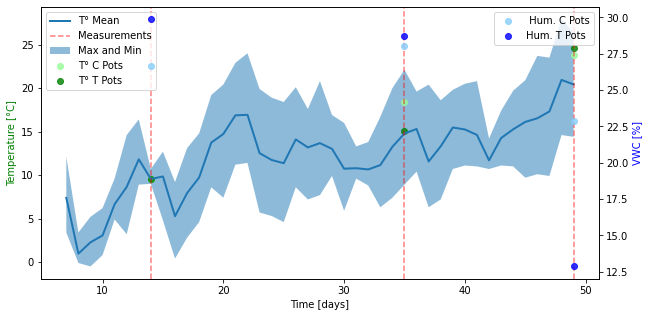

In [11]:
fig, ax1 = plt.subplots()
#Temperature
ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
ax1.scatter(time_msm, C_temp_avg, c='palegreen', alpha=0.8, label = "T° C Pots")
ax1.scatter(time_msm, T_temp_avg, c='g', alpha=0.8, label = "T° T Pots")
ax2 = ax1.twinx()
#Humidity
ax2.set_ylabel("VWC [%]", color = "blue")
ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "g")
#Campaigns
ax1.axvline(x=14, color='red', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='red', linestyle='--', alpha=0.5)
#ax1.legend(loc='upper left')
ax1.legend(loc='upper left')
plt.legend()

In [28]:
#initializing light data
light = dataset.iloc[0:2062,1]
lightday = []
for i in range(0,len(light),48):
    lightday.append(mean(light[i:i+48]))
timeday = []
for i in range(7,50):
    timeday.append(i)

In [18]:
tempday = []
tempdaymax = []
tempdaymin = []
for i in range(0,len(temp),48):
    tempday.append(mean(temp[i:i+48]))
    tempdaymax.append(max(temp[i:i+48]))
    tempdaymin.append(min(temp[i:i+48]))
timeday = []
for i in range(7,50):
    timeday.append(i)

TypeError: 'list' object is not callable

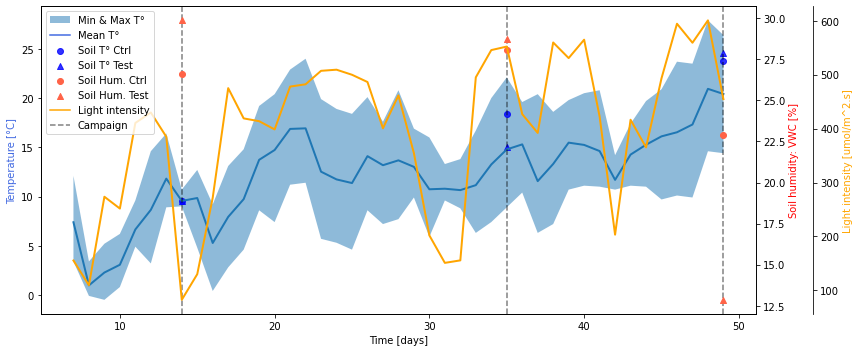

In [102]:
fig, ax1 = plt.subplots()
# Outside temperature
fill = ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
mean = ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
# Pots temperature
C_T = ax1.scatter(time_msm, C_temp_avg, c='b', alpha=0.8, label = "T° C Pots")
T_T = ax1.scatter(time_msm, T_temp_avg, c='b', alpha=0.8, label = "T° T Pots", marker = "^")
# Pots humidity
ax2 = ax1.twinx()
ax2.set_ylabel("Soil humidity: VWC [%]", color = "r")
C_H = ax2.scatter(time_msm, C_hum_avg, c='tomato', alpha=1, label = " Hum. C Pots")
T_H = ax2.scatter(time_msm, T_hum_avg, c='tomato', alpha=1, label = "Hum. T Pots", marker = "^")
# Plot aspect
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "royalblue")
# Measurement campaigns
measure = ax1.axvline(x=14, color='black', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='black', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='black', linestyle='--', alpha=0.5)
#light
ax3 = ax1.twinx()
lght = ax3.plot(timeday, lightday, linewidth=2, color="orange", label="Light")
ax3.set_ylabel("Light intensity [umol/m^2.s]", color = "orange")
#correcting axis position
ax3.spines["right"].set_position(("axes", 1.08))
# proxy artist for mean
import matplotlib.lines as mlines
mean_blue = mlines.Line2D([],[], color="royalblue", label = "Mean ext. T°")
# proxy artist for light
light_orange = mlines.Line2D([],[], color="orange", label = "Light intensity")
# legend aspect
plt.legend([fill,mean_blue,C_T,T_T,C_H,T_H,light_orange, measure], ["Min & Max T°","Mean T°", "Soil T° Ctrl", "Soil T° Test","Soil Hum. Ctrl","Soil Hum. Test", "Light intensity", "Campaign"], loc="upper left")
# fig aspect
plt.rcParams['figure.figsize'] = [12, 5]
plt.tight_layout()

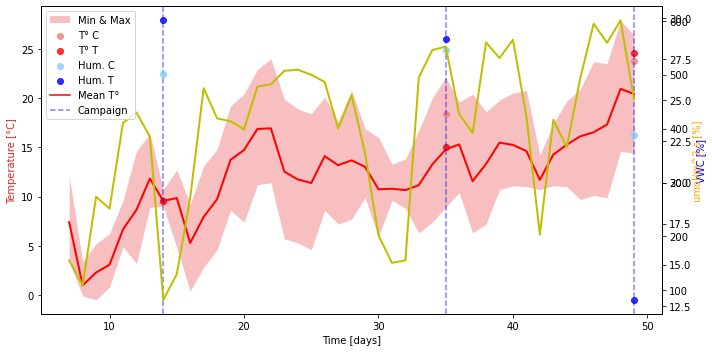

In [78]:
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=0.75)
fill = ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, color = "lightcoral", linewidth=0, label="Max and Min")
mean = ax1.plot(timeday, tempday, color = "r", linewidth=2, label="T° Mean")
C_T = ax1.scatter(time_msm, C_temp_avg, c='lightcoral', alpha=0.8, label = "T° C Pots")
T_T = ax1.scatter(time_msm, T_temp_avg, c='r', alpha=0.8, label = "T° T Pots")

ax2 = ax1.twinx()
ax2.set_ylabel("VWC [%]", color = "blue")
C_H = ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
T_H = ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "tab:red")
measure = ax1.axvline(x=14, color='b', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='b', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='b', linestyle='--', alpha=0.5)
#light
ax3 = ax1.twinx()
#ax3.set_position([[1, 0],[1,1]], which = "both")
ax3.plot(timeday, lightday, linewidth=2, color="y", label="Light")
ax3.set_ylabel("umol/m^2.s [%]", color = "orange")

# proxy artist for mean
import matplotlib.lines as mlines
mean_red = mlines.Line2D([],[], color="red", label = "Mean T°")
plt.legend([fill,C_T,T_T,C_H,T_H,mean_red,measure], ["Min & Max", "T° C", "T° T","Hum. C","Hum. T","Mean T°", "Campaign"], loc="upper left")
plt.rcParams['figure.figsize'] = [10, 5]
plt.tight_layout()

In [13]:
# same but with light
light = dataset.iloc[0:2062,1]
lightday = []
lightdaymax = []
lightdaymin = []
for i in range(0,len(light),48):
    lightday.append(mean(light[i:i+48]))
    lightdaymax.append(max(light[i:i+48]))
    lightdaymin.append(min(light[i:i+48]))
timeday = []
for i in range(7,50):
    timeday.append(i)
#plot
fig, ax = plt.subplots()
#plt.fill_between(timeday,lightdaymax,lightdaymin, alpha=.5, linewidth=0, label="Max and Min")
plt.plot(timeday, lightday, linewidth=2, label="Mean")
plt.xlabel("Time [days]")
plt.ylabel("Light [umol/(m^2.s)]")
plt.axvline(x=14, color='red', linestyle='--', label  = "Measurements")
plt.axvline(x=35, color='red', linestyle='--')
plt.axvline(x=49, color='red', linestyle='--')
plt.legend(loc='upper left')

TypeError: 'list' object is not callable

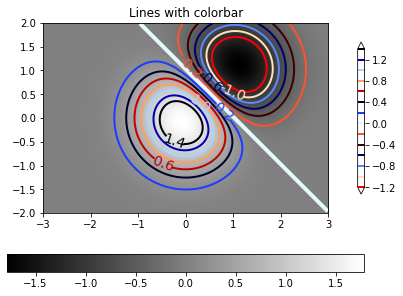

In [71]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = ax.contour(Z, levels, origin='lower', cmap='flag', extend='both',
                linewidths=2, extent=(-3, 3, -2, 2))

# Thicken the zero contour.
CS.collections[6].set_linewidth(4)

ax.clabel(CS, levels[1::2],  # label every second level
          inline=True, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
CB = fig.colorbar(CS, shrink=0.8)

ax.set_title('Lines with colorbar')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = ax.get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll-0.11, b + 0.1*h, ww, h*0.8])

plt.show()